In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# X ; Y; Z; Pressure; GripAngle; Timestamp; Test ID
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

from Utils import tableCreater, tableCreaterArticle, listPeopleArticle

In [2]:
path_control = [
    'data_motion/hw_dataset/control/C_0001.txt',
    'data_motion/hw_dataset/control/C_0002.txt',
    'data_motion/hw_dataset/control/C_0003.txt',
    'data_motion/hw_dataset/control/C_0004.txt',
    'data_motion/hw_dataset/control/C_0005.txt',
    'data_motion/hw_dataset/control/C_0006.txt',
    'data_motion/hw_dataset/control/C_0007.txt',
    'data_motion/hw_dataset/control/C_0008.txt',
    'data_motion/hw_dataset/control/C_0009.txt',
    'data_motion/hw_dataset/control/C_0010.txt',
    'data_motion/hw_dataset/control/C_0011.txt',
    'data_motion/hw_dataset/control/C_0012.txt',
    'data_motion/hw_dataset/control/C_0013.txt',
    'data_motion/hw_dataset/control/C_0014.txt',
    'data_motion/hw_dataset/control/C_0015.txt'
]

In [3]:
path_parkinson = [
    'data_motion/hw_dataset/parkinson/P_02100001.txt',
    'data_motion/hw_dataset/parkinson/P_02100002.txt',
    'data_motion/hw_dataset/parkinson/P_05060003.txt',
    'data_motion/hw_dataset/parkinson/P_05060004.txt',
    'data_motion/hw_dataset/parkinson/P_09100001.txt',
    'data_motion/hw_dataset/parkinson/P_09100003.txt',
    'data_motion/hw_dataset/parkinson/P_09100005.txt',
    'data_motion/hw_dataset/parkinson/P_11120003.txt',
    'data_motion/hw_dataset/parkinson/P_11120004.txt',
    'data_motion/hw_dataset/parkinson/P_11120005.txt',
    'data_motion/hw_dataset/parkinson/P_12060001.txt',
    'data_motion/hw_dataset/parkinson/P_12060002.txt',
    'data_motion/hw_dataset/parkinson/P_16100003.txt',
    'data_motion/hw_dataset/parkinson/P_16100004.txt',
    'data_motion/hw_dataset/parkinson/P_23100002.txt',
    'data_motion/hw_dataset/parkinson/P_23100003.txt',
    'data_motion/hw_dataset/parkinson/P_26060001.txt',
    'data_motion/hw_dataset/parkinson/P_26060002.txt',
    'data_motion/hw_dataset/parkinson/P_26060003.txt',
    'data_motion/hw_dataset/parkinson/P_26060006.txt',
    'data_motion/hw_dataset/parkinson/P_26060007.txt',
    'data_motion/hw_dataset/parkinson/P_27110001.txt',
    'data_motion/hw_dataset/parkinson/P_27110003.txt',
    'data_motion/hw_dataset/parkinson/P_30100001.txt',
    'data_motion/hw_dataset/parkinson/P_30100002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0001.txt',
    'data_motion/new_dataset/parkinson/H_P000-0002.txt',
    'data_motion/new_dataset/parkinson/H_P000-0003.txt',
    'data_motion/new_dataset/parkinson/H_P000-0004.txt',
    'data_motion/new_dataset/parkinson/H_P000-0007.txt',
    'data_motion/new_dataset/parkinson/H_P000-0008.txt',
    'data_motion/new_dataset/parkinson/H_p000-0010.txt',
    'data_motion/new_dataset/parkinson/H_P000-0011.txt',
    'data_motion/new_dataset/parkinson/H_P000-0012.txt',
    'data_motion/new_dataset/parkinson/H_P000-0013.txt',
    'data_motion/new_dataset/parkinson/H_P000-0014.txt',
    'data_motion/new_dataset/parkinson/H_P000-0015.txt',
    'data_motion/new_dataset/parkinson/H_P000-0016.txt',
    'data_motion/new_dataset/parkinson/H_p000-0017.txt',
    'data_motion/new_dataset/parkinson/H_p000-0018.txt',
    'data_motion/new_dataset/parkinson/H_P000-0019.txt',
    'data_motion/new_dataset/parkinson/H_P000-0020.txt',
    'data_motion/new_dataset/parkinson/H_P000-0021.txt',
    'data_motion/new_dataset/parkinson/H_P000-0022.txt',
    'data_motion/new_dataset/parkinson/H_P000-0023.txt',
    'data_motion/new_dataset/parkinson/H_P000-0024.txt',
    'data_motion/new_dataset/parkinson/H_P000-0025.txt',
    'data_motion/new_dataset/parkinson/H_p000-0028.txt',
    'data_motion/new_dataset/parkinson/H_P000-0029.txt',
    'data_motion/new_dataset/parkinson/H_P000-0030.txt',
    'data_motion/new_dataset/parkinson/H_P000-0031.txt',
    'data_motion/new_dataset/parkinson/H_P000-0032.txt',
    'data_motion/new_dataset/parkinson/H_P000-0033.txt',
    'data_motion/new_dataset/parkinson/H_P000-0034.txt',
    'data_motion/new_dataset/parkinson/H_P000-0035.txt',
    'data_motion/new_dataset/parkinson/H_P000-0036.txt',
    'data_motion/new_dataset/parkinson/H_P000-0037.txt',
    'data_motion/new_dataset/parkinson/H_P000-0039.txt',
    'data_motion/new_dataset/parkinson/H_P000-0040.txt',
    'data_motion/new_dataset/parkinson/H_p000-0041.txt',
    'data_motion/new_dataset/parkinson/H_p000-0042.txt',
    'data_motion/new_dataset/parkinson/H_p000-0043.txt'
]

In [4]:
testID = 0

In [5]:
listControl = listPeopleArticle(path_control, testID)
listParkinson = listPeopleArticle(path_parkinson, testID)

In [6]:
listControl[0].head(20)

,x,y,z,position_0,Pressure,GripAngle,Timestamp,TestID,velocity_0
0,200,204,0,0.000000,73,910,1732647300,0,0.000000
1,200,204,0,0.000000,218,900,1732647307,0,0.000000
2,200,204,0,0.000000,253,900,1732647314,0,0.000000
3,200,204,0,0.000000,304,900,1732647321,0,0.000000
4,200,204,0,0.000000,351,900,1732647328,0,0.000000
5,200,204,0,0.000000,386,900,1732647335,0,0.000000
6,200,204,0,0.000000,413,910,1732647342,0,0.000000
7,200,204,0,1.414214,437,910,1732647349,0,188.090404
8,201,203,0,1.000000,460,910,1732647356,0,133.000000
9,202,203,0,0.000000,479,910,1732647363,0,0.000000


In [7]:
listControl, controlDiagnoses = tableCreaterArticle(listControl, 0, testID)
listParkinson, parkinsonDiagnoses = tableCreaterArticle(listParkinson, 1, testID)

In [8]:
listPerson = pd.concat([listControl, listParkinson])
listDiagnoses = np.concatenate([controlDiagnoses, parkinsonDiagnoses])

In [9]:
listPerson

,velocityWeighted,pressureWeighted,CISP
0,166.545769,898.051761,149566.721125
1,148.699103,793.014769,117920.585005
2,147.285197,850.331795,125241.286024
3,152.507921,897.886052,136934.734786
4,188.952987,935.801218,176822.435308
...,...,...,...
56,322.534903,497.101075,160332.447061
57,551.387807,752.638982,414995.957945
58,224.635038,630.446873,141620.457424
59,183.983337,553.073111,101756.236362


In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(listPerson, listDiagnoses, train_size=0.8)

In [18]:
knnc = KNeighborsClassifier().fit(xTrain, yTrain)
cartc = DecisionTreeClassifier().fit(xTrain, yTrain)
rfc = RandomForestClassifier().fit(xTrain, yTrain)

In [19]:
modelsc = [knnc, cartc, rfc]

acc = []
sens = []
esp = []

for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(yTest.shape[0]):
        if yTest[i] == 0 and predict[i] == 0:
            TN +=1
        elif yTest[i] == 1 and predict[i] == 1:
            TP +=1
        elif yTest[i] == 1 and predict[i] == 0:
            FN +=1
        elif yTest[i] == 0 and predict[i] == 1:
            FP +=1
    print(name + ": ")
    print("ACC-->", accuracy_score(yTest, predict))
    acc.append((TP+TN)/(TP+TN+FN+FP)*100)
    sens.append((TP)/(TP+FN)*100)
    esp.append((TN)/(TN+FP)*100)

KNeighborsClassifier: 
ACC--> 0.8125
DecisionTreeClassifier: 
ACC--> 0.875
RandomForestClassifier: 
ACC--> 0.9375


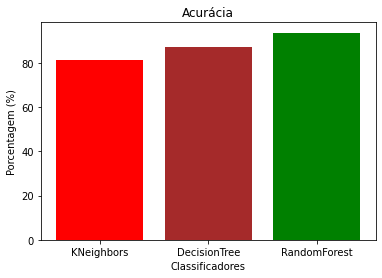

In [20]:
plt.figure(0)
plt.xlabel("Classificadores")
plt.ylabel("Porcentagem (%)")
plt.title("Acurácia")
plt.bar(['KNeighbors','DecisionTree','RandomForest'],acc,color=['red','brown','green'])
plt.savefig('acuracia.png')

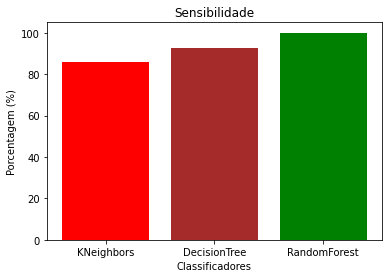

In [21]:
plt.figure(1)
plt.xlabel("Classificadores")
plt.ylabel("Porcentagem (%)")
plt.title("Sensibilidade")
plt.bar(['KNeighbors','DecisionTree','RandomForest'],sens,color=['red','brown','green'])
plt.savefig('sensibilidade.png')

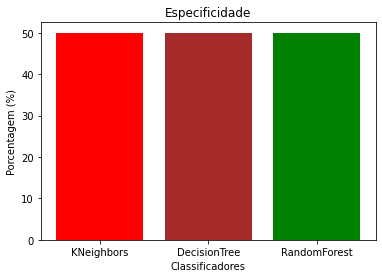

In [22]:
plt.figure(2)
plt.xlabel("Classificadores")
plt.ylabel("Porcentagem (%)")
plt.title("Especificidade")
plt.bar(['KNeighbors','DecisionTree','RandomForest'],esp,color=['red','brown','green'])
plt.savefig('especificidade.png')

In [23]:
acc,sens,esp

([81.25, 87.5, 93.75],
 [85.71428571428571, 92.85714285714286, 100.0],
 [50.0, 50.0, 50.0])

In [31]:
yTest

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
yTrain

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0])